In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import argparse
from models.HPM import HPM
from txtfeeder import TXTFeeder
from models.AE import autoencoder
import torch
import time
import os
from torch import nn
from SDR import SDR

localtime = time.asctime(time.localtime(time.time()))
from torch.utils.tensorboard import SummaryWriter

In [3]:
NumOnBits = 10
NumBits = 512
Seed = 42
InputNoise = 0.1
SaveInterval = 100000
TestInterval = 100000
learning_rate = 1e-3
inputNoise = 0.1
numTestCharacter = 50000

# n_epochs = args.epoch # start smaller if you are just testing initial behavior
# n_layers = args.layers
# writer = SummaryWriter('../runs/exp-26-' + ' ' + localtime, comment='EXP-26 Layer'+str(n_layers))
# os.makedirs('./save', exist_ok=True)
# archiveFilePath = './save/exp-26-' + str(n_layers) + ' ' + localtime + '.pt'


In [4]:
asc_chars = [chr(i) for i in range(128)]
char_sdr = SDR(asc_chars,
                numBits=NumBits,
                numOnBits=NumOnBits,
                inputNoise=inputNoise,
                seed=42);
trainFeeder = TXTFeeder('../data/500K-test.txt',
                     numBits=NumBits,
                     numOnBits=NumOnBits,
                     inputNoise=InputNoise,
                     SDR=char_sdr)
testFeeder = TXTFeeder('../data/500K-test.txt',
                     numBits=NumBits,
                     numOnBits=NumOnBits,
                     inputNoise=InputNoise,
                     SDR=char_sdr)
criterion = nn.BCEWithLogitsLoss()

In [5]:
AE = autoencoder(numBits=NumBits)

optimizer = torch.optim.Adam(AE.parameters(),
                                 lr=learning_rate,
                                 weight_decay=1e-5)

In [6]:
trainLoss = 0.0
input = []
for _ in range(4):
    signal = trainFeeder.feed()
    signal = np.squeeze(signal).tolist()
    input.extend(signal)
input = torch.tensor(input)
input = torch.reshape(input, (1, -1))

In [7]:
from torchviz import make_dot, make_dot_from_trace

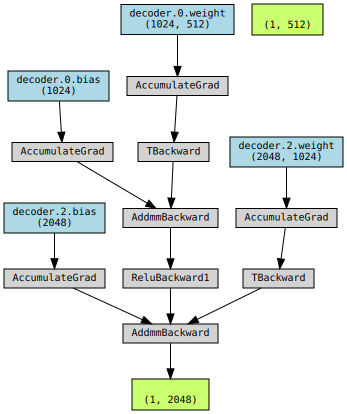

In [8]:
make_dot(AE(input), params=dict(AE.named_parameters()))

In [9]:
from models.AE import simple_autoencoder
simpleAE = simple_autoencoder(numBits=NumBits)

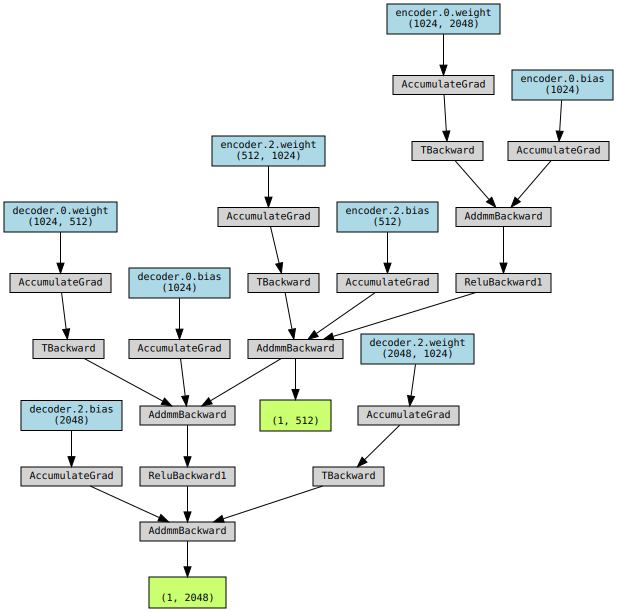

In [10]:
make_dot(simpleAE(input), params=dict(simpleAE.named_parameters()))

In [11]:
from torch import nn

In [12]:
from models.AE import simple_autoencoder2
simpleAE2 = simple_autoencoder2(numBits=NumBits)

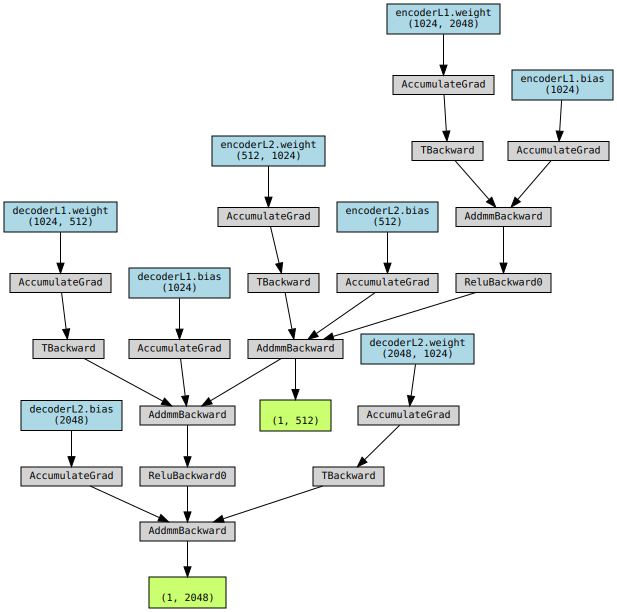

In [13]:
make_dot(simpleAE2(input), params=dict(simpleAE2.named_parameters()))